#  spectra for Ronchi at AuxTel for Scan data - Read Pickle

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory

- creation date : December 9th  2021

- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [53]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [54]:
import pickle

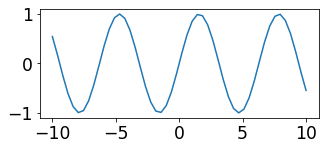

In [55]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [56]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [57]:
from datetime import datetime,date

In [58]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [59]:
string_date

'2021-12-15'

In [60]:
from iminuit import Minuit
import iminuit

In [61]:
iminuit.__version__

'2.7.0'

In [62]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [63]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [64]:
from time import sleep

In [65]:
from astropy.time import Time
import astropy.units as u

# Read from pickle

In [66]:
infilename='ronchi170-scan-auxtel.pickle'

In [67]:
with open(infilename, 'rb') as pickle_file:
    content = pickle.load(pickle_file)

In [68]:
content

{'ronchi170lpmm_empty_HD2811_20210909_000600_quickLookExp_spectrum.fits': {'number': 600.0,
  'targetx_pix': 333.1573645654408,
  'targety_pix': 2270.218971813826,
  'rotangle': -1.043130371636775,
  'd2ccd': 182.3335009895922,
  'all_lambdas': array([ 300.64387446,  301.28684362,  301.9298023 , ..., 1097.00841295,
         1097.62095683, 1098.23346409]),
  'all_fluxes': array([ 5.47359655e-15, -1.54331394e-14, -2.15618810e-14, ...,
         -1.87961415e-14, -2.28703227e-14, -1.82989304e-14]),
  'all_fluxes_err': array([2.12288274e-14, 1.93028808e-14, 1.68531593e-14, ...,
         8.20494831e-15, 9.29555379e-15, 1.00574276e-14])},
 'ronchi170lpmm_empty_HD2811_20210909_000601_quickLookExp_spectrum.fits': {'number': 601.0,
  'targetx_pix': 347.1394614058548,
  'targety_pix': 2268.75593475022,
  'rotangle': -1.05890630008598,
  'd2ccd': 181.4678472071839,
  'all_lambdas': array([ 300.59896555,  301.24500538,  301.89103464, ..., 1101.27346987,
         1101.88868045, 1102.50385391]),
  'al

In [69]:
NN=len(content)

# Number

In [70]:
all_number=[]
for key, value in content.items():
    all_number.append(value["number"])
all_number=np.array(all_number)

# Angles

In [71]:
all_angles=[]
for key, value in content.items():
    all_angles.append(value["rotangle"])

In [72]:
all_angles=np.array(all_angles)

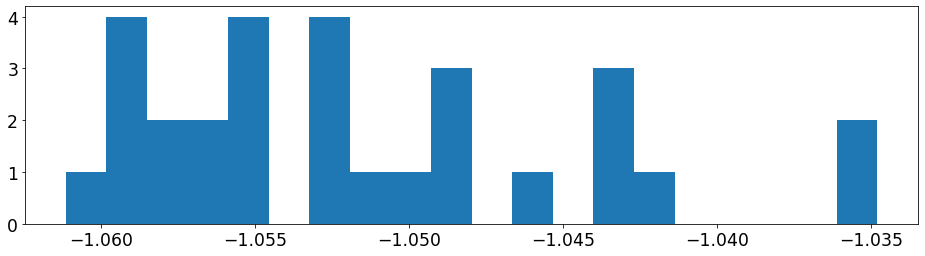

In [73]:
plt.hist(all_angles,bins=20);

In [74]:
all_angles.mean()

-1.0514037218784937

In [75]:
np.median(all_angles)

-1.052683585393292

In [76]:
all_angles.std()

0.007078925836118255

# Position

In [77]:
def plotScanPosition(X,Y,tag,xlims=(0,4000),ylims=(0,4000),flag_annotate=True,figsize=(8,8),title=""):
    """
    """
    
    NN=len(X)
    
    # wavelength bin colors
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NN)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)
    
    
    
    plt.figure(figsize=figsize)
    
    sc = plt.scatter(X, Y, s=200, c=all_colors, cmap="seismic")
    #cb=plt.colorbar(sc)
    #cb.ax.set_ylabel('rotation angle (deg)')

    
    if flag_annotate:
        K=len(tag)
        for idx in range(K):
            plt.annotate(tag[idx],xy=(X[idx],Y[idx]), color="k", ha='center',va='top',fontsize=15)
            #plt.annotate(tag[idx],xy=(X[idx],Y[idx]), color="k",fontsize=10)
            #plt.text(X[idx],Y[idx],tag[idx],  horizontalalignment='center',verticalalignment='top',color="k",fontsize=10)
        
    
    plt.xlim(xlims)  
    plt.ylim(ylims)  
    
    
    plt.xlabel("X (pix)")
    plt.ylabel("Y (pix)")
    plt.grid()
    axes=plt.gca()
    axes.set_aspect('equal')
    
    plt.title(title)
    plt.tight_layout()
    
    plt.show()
            

In [78]:
all_xpix=[]
for key, value in content.items():
    all_xpix.append(value["targetx_pix"])
all_xpix=np.array(all_xpix)

In [79]:
all_ypix=[]
for key, value in content.items():
    all_ypix.append(value["targety_pix"])
all_ypix=np.array(all_ypix)

In [80]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NN)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NN), alpha=1)

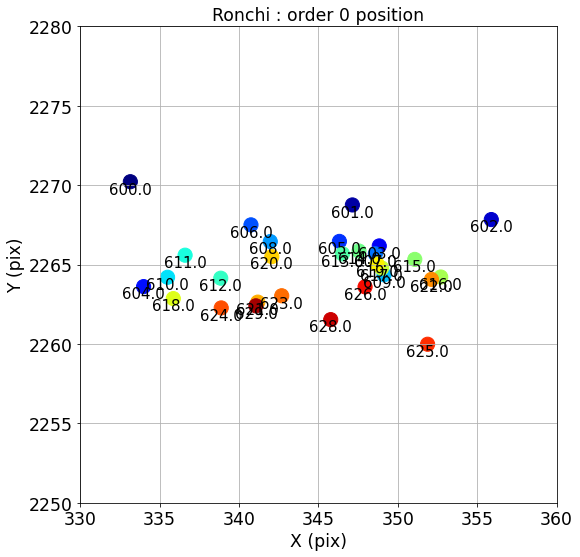

In [90]:
plotScanPosition(all_xpix,all_ypix,all_number,xlims=(330,360),ylims=(2250,2280),title="Ronchi : order 0 position")